![Banner challenge](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner%20de%20Challenge%20parte%202.png)

El análisis de evasión de clientes (también conocido como "churn analysis") es un problema clásico de clasificación en el campo del aprendizaje automático. El objetivo es construir un modelo que pueda predecir qué clientes tienen más probabilidades de cancelar sus servicios en un futuro cercano.

En esencia, estás buscando crear un modelo que aprenda a identificar patrones y características en los datos de los clientes que se correlacionan con la probabilidad de abandono. Estos patrones pueden incluir información demográfica, historial de uso del servicio, interacciones con el servicio al cliente, entre otros.

Para lograr esto, deberás seguir un proceso que incluye:

* Recopilación y preparación de datos: Obtener los datos relevantes de los clientes y limpiarlos para eliminar errores o inconsistencias.

* Ingeniería de características: Crear nuevas características a partir de los datos existentes que puedan ser útiles para el modelo.

* Selección de modelo: Elegir un algoritmo de clasificación adecuado para el problema, como regresión logística, árboles de decisión, bosques aleatorios o máquinas de vectores de soporte.

* Entrenamiento del modelo: Utilizar los datos preparados para entrenar el modelo y ajustar sus parámetros.

* Evaluación del modelo: Medir el rendimiento del modelo utilizando métricas como precisión, exhaustividad, F1-score y AUC-ROC.

* Implementación del modelo: Integrar el modelo en un sistema que pueda predecir la probabilidad de abandono de los clientes en tiempo real.

El proceso de preparación de datos y selección de modelos debe seguir este flujo:

Conocer tus datos:
--

* Tipo de variables: Identificar si son categóricas (nominales, ordinales, binarias) o numéricas (discretas, continuas).
* Distribución: Analizar cómo se distribuyen los valores de cada variable (histogramas, boxplots, etc.).
Valores faltantes: Identificar si hay valores faltantes y cómo manejarlos.
* Valores atípicos: Detectar valores atípicos que puedan afectar el rendimiento del modelo.
* Relaciones: Explorar las relaciones entre las variables (correlaciones, gráficos de dispersión, etc.).

Tratamiento de datos:
--
* En función de los datos: Aplicar las técnicas de preprocesamiento adecuadas para cada tipo de variable y para abordar los problemas identificados en el paso anterior (escalado, transformación, codificación, imputación de valores faltantes, etc.).

* En función de los modelos: Considerar los requisitos y supuestos de los modelos que planeas utilizar. Algunos modelos son más sensibles a la escala de las variables, a la presencia de valores atípicos o a la multicolinealidad.

Selección de modelos:
--
* En función del problema: Elegir modelos que sean adecuados para el tipo de problema que estás resolviendo (clasificación, regresión, clustering, etc.).

* En función de los datos: Considerar las características de tus datos al elegir un modelo. Algunos modelos funcionan mejor con datos lineales, mientras que otros son más adecuados para datos no lineales.

* En función de los objetivos: Tener en cuenta tus objetivos al elegir un modelo. ¿Quieres maximizar la precisión? ¿Quieres obtener un modelo interpretable? ¿Quieres un modelo que sea robusto a valores atípicos?
En resumen, el proceso de preparación de datos y selección de modelos es iterativo y depende de tus datos, tus modelos y tus objetivos. ¡No hay una receta única!

#💾 **Extracción de datos tratados.**

In [49]:
import pandas as pd
import requests
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Importando Json

url1 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/TelecomX_Data%20(1).json"
response = requests.get(url1)
data = response.json()
dfjson = pd.DataFrame(data)
dfjson.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [51]:
dfjson_normalizado = json_normalize(data)
dfjson_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [52]:
#Importar en formato CSV
dfjson_normalizado.to_csv('TelecomX_Data.csv', index=False)

# **Preparación de los Datos.**

---

![Banner preparación datos](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner_%20Secci%C3%B3n_%20preparaci%C3%B3n.png)

---

In [53]:
url2 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/TelecomX_Data.csv"
df = pd.read_csv(url2)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##**Verificación de la Proporción de Cancelación (Churn)**


Cuadro de frecuencia absoluta y relativa de 'Cancelación'.


,Frecuencia,Proporción (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


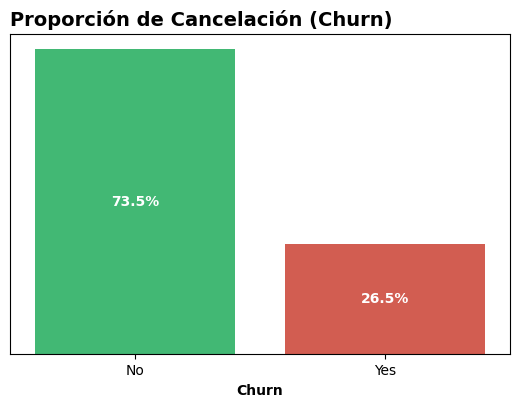

In [106]:
#Código para verificar proporción de cancelación.
churn_frecuencia = df['Churn'].value_counts()
churn_proporcion = df['Churn'].value_counts(normalize=True)*100

#Tabla combinada.
df_churn = pd.DataFrame(
    {'Frecuencia': churn_frecuencia, 'Proporción (%)': churn_proporcion.round(2)}
)

print(f"Cuadro de frecuencia absoluta y relativa de 'Cancelación'.")
display(df_churn)
print(f"\n")

#Gráfico de barras.
colores = ['#2ecc71', '#e74c3c']

fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x='Churn', hue='Churn', data=df, palette=colores, legend=False, ax=ax)

# Título y etiquetas
ax.set_title('Proporción de Cancelación (Churn)', fontsize=14, loc='left', fontweight='bold')
ax.set_xlabel('Churn', fontweight='bold')
ax.set_ylabel('')  # sin título en eje Y

# Quitar ticks del eje Y
ax.set_yticks([])

# Mostrar porcentajes dentro de las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    porcentaje = f'{100 * height / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        porcentaje,
        ha='center', va='center', color='white', fontweight='bold'
    )

# Dejar margen inferior y recortar el resto
plt.subplots_adjust(top=1, bottom=0.2, left=0, right=1)

plt.show()
print()


In [57]:
#Convertir columna account.Charges.Total en tipo float64.
df['account.Charges.Total'] = df['account.Charges.Total'].str.replace(',', '.',regex=True)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [59]:
df.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [60]:
#Eliminamos los datos nulos en la variable dependiente.
df = df.dropna(subset=['Churn'])

In [61]:
#Agregar columna de Cargo_Diario.
#Creo columna Cuentas_diarias.
df['Cuentas_diarias'] = df['account.Charges.Total']/30
df['Cuentas_diarias']

,Cuentas_diarias
0,19.776667
1,18.080000
2,9.361667
3,41.261667
4,8.913333
...,...
7262,24.763333
7263,62.456667
7264,3.091667
7265,154.255000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

##**Eliminando columnas irrelevantes.**

In [63]:
df = df.drop(columns=['customerID'])

In [64]:
#Para eliminan redundancia en los datos.
df_clean = df.copy()

In [65]:
df_clean.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias'],
      dtype='object')

In [66]:
col_agrupar = ['internet.OnlineSecurity', 'internet.OnlineBackup',
               'internet.DeviceProtection', 'internet.TechSupport',
               'internet.StreamingTV', 'internet.StreamingMovies']

for col in col_agrupar:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

In [67]:
col_categoricas = ['Churn', 'customer.gender',
                   'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                   'internet.OnlineSecurity', 'internet.OnlineBackup',
                   'internet.DeviceProtection', 'internet.TechSupport',
                   'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
                    'account.PaperlessBilling', 'account.PaymentMethod']

##**Encoding**

In [68]:
df_encoding = pd.get_dummies(df_clean, columns=col_categoricas, drop_first=True)
df_encoding.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,19.776667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,18.080000,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,9.361667,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,41.261667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,8.913333,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [69]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Cuentas_diarias                                7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 non-n

In [70]:
df_encoding.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
Cuentas_diarias,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [71]:
#Borran valores nulos en columnas account.Charges.Total y Cuentas_diarias

df_encoding = df_encoding.dropna(subset=['account.Charges.Total', 'Cuentas_diarias'])

In [72]:
df_encoding[['account.Charges.Total', 'Cuentas_diarias']].isnull().sum()

,0
account.Charges.Total,0
Cuentas_diarias,0


##**Análisis de Correlación**

In [73]:
corr = df_encoding.corr()

In [74]:
target_var = 'Churn_Yes'
corr_target = df_encoding.corr()[target_var].sort_values(ascending=False)
print(corr_target)

Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
account.Charges.Monthly                          0.192858
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partner_Yes                            -0.149982
customer.Depen

##**Heatmap**

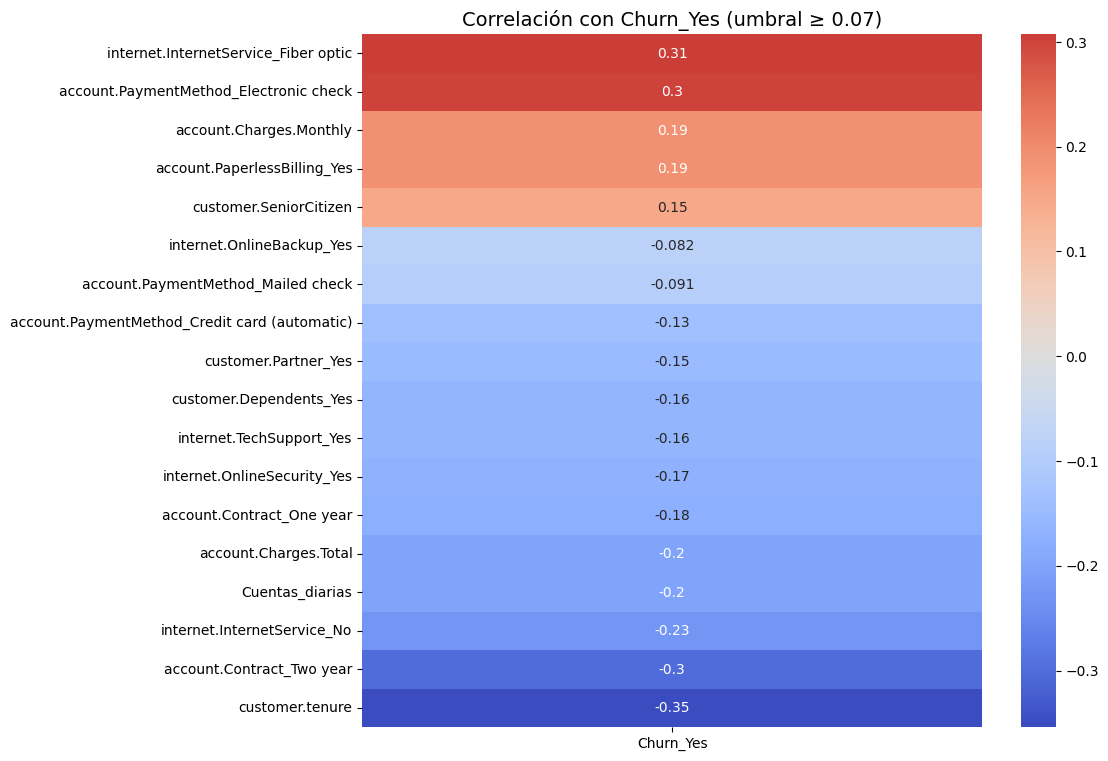

In [75]:

# Variable objetivo
target_var = 'Churn_Yes'

# Calcular matriz de correlación
corr = df_encoding.corr()

# Filtrar por correlación mínima con el target (0.07)
corr_target = corr[target_var][abs(corr[target_var]) >= 0.07]

# Quitar el target de la lista para no graficarlo consigo mismo
corr_target = corr_target.drop(target_var)

# Ordenar por mayor correlación
corr_target = corr_target.sort_values(ascending=False)

# Crear un dataframe filtrado solo con las variables relevantes
corr_filtrada = corr.loc[corr_target.index]

# Graficar heatmap
plt.figure(figsize=(10, len(corr_target) * 0.5))  # alto dinámico según cantidad de variables
sns.heatmap(corr_filtrada[[target_var]], annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlación con {target_var} (umbral ≥ 0.07)", fontsize=14)
plt.show()

* El mapa representa la matriz de correlación con todas la variables involucradas con correlación absoluta ≥ 0.07 respecto a Churn_Yes, ordenada en forma descendente.

 - Colores rojos → correlación positiva fuerte.

 - Colores azules → correlación negativa fuerte.

 - Valores cercanos a 0 → poca relación.

* Nota.

  El filtro de relación se aplica como herramienta práctica para enfocarnos en relaciones más marcadas de forma individual.

  Se elimina el target para que no aparezca con correlación 1.0.

  A partir de 0.8 se considera una correlación alta.



##**Análisis de Multicoliniaridad.**

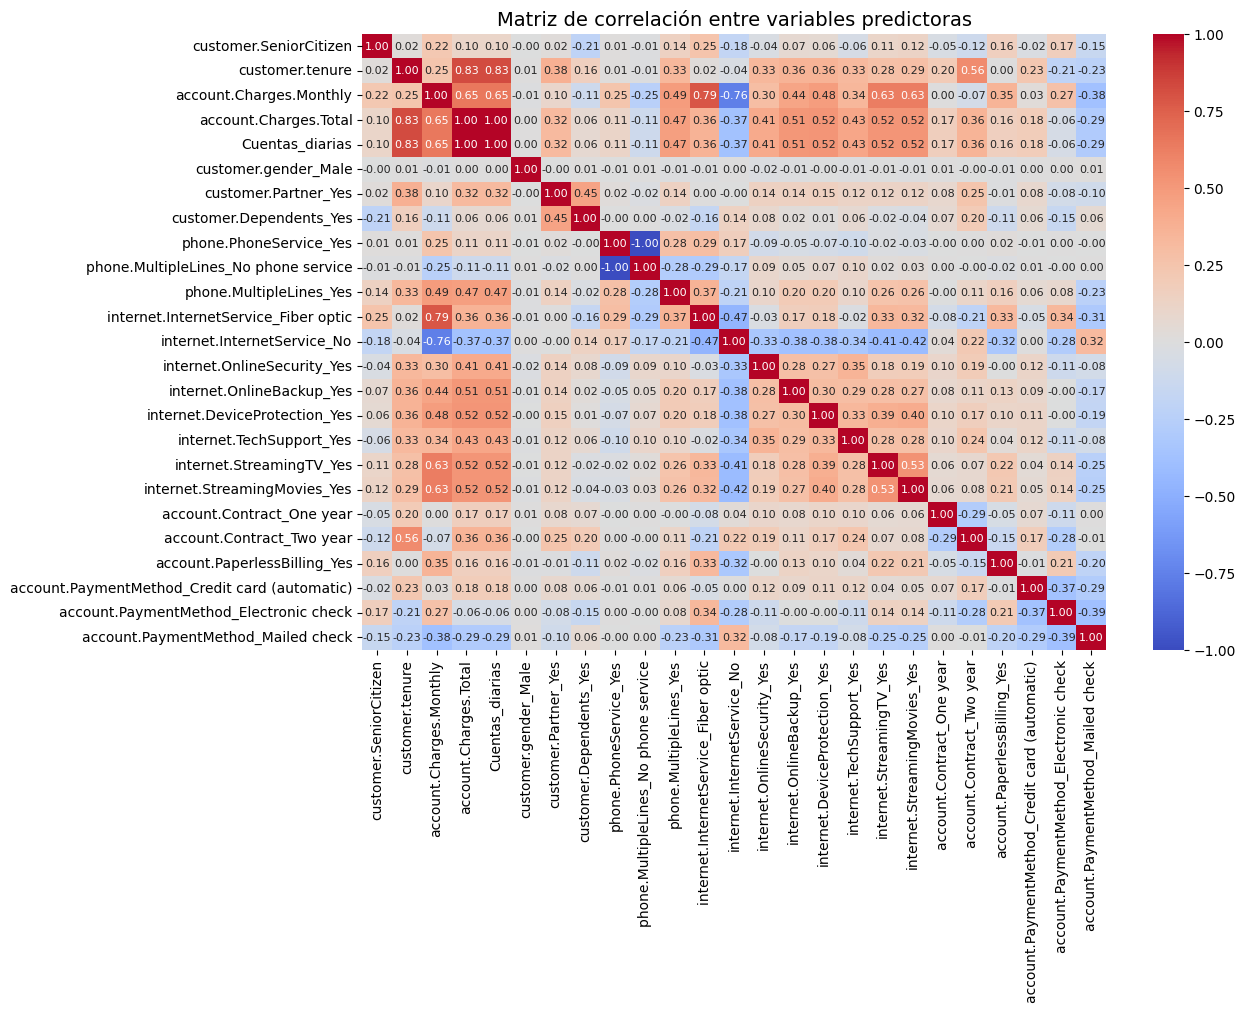

In [76]:


# Matriz de correlación solo para variables predictoras (quitamos el target)
predictoras = df_encoding.drop(columns=[target_var])
corr_matrix = predictoras.corr()

# Graficar heatmap con coeficientes
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,           # Mostrar los números
    fmt=".2f",            # Formato de 2 decimales
    annot_kws={"size": 8} # Tamaño del texto de los coeficientes
)
plt.title("Matriz de correlación entre variables predictoras", fontsize=14)
plt.show()


1. Importar las bibliotecas necesarias

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Normalización y Estandarización.

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
df_encoding.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_diarias', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes',
       'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

In [80]:
#Copia para no modificar datos originales.
df_encoding_copy = df_encoding.copy()

3. Seleccionar las variables independientes.

In [81]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoding_copy.drop(columns=['Churn_Yes'])

4. Añadir constante (intercepto).

In [82]:
X_const = add_constant(X)

5. Calcular el VIF.

In [83]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,account.Charges.Total,inf
5,Cuentas_diarias,inf
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
3,account.Charges.Monthly,866.089640
12,internet.InternetService_Fiber optic,148.500814
13,internet.InternetService_No,104.213701
19,internet.StreamingMovies_Yes,24.156394
18,internet.StreamingTV_Yes,24.080019
2,customer.tenure,7.584453


Análisis de resultados.

💡 Regla práctica para modelos lineales:

 - <= 1 no existe multicoliniaridad.
 - VIF ≤ 5 → seguro.

 - 5 < VIF ≤ 10 → revisar, pero podría usarse.

 - VIF > 10 → alto riesgo → evaluar eliminar o transformar.


 - INF significa infinito y se interpreta como colinealidad perfecta. Una variable está perfectamente explicada por una o más variables del conjunto.
 En otras palabras esa variables es una combinación lineal exacta de otras. Y eso se traduce que hemos introducido 2 variables que en realidad contienen la misma información. Puede que esté duplicada o que una variable se calcula a partir de otra.

 ¿Qué hacer?
 - Debemos buscar el par de variables que que están duplicando la información.
 - Elimiar una de las variables redundantes.
 - Si es por variable dummy aplicar drop_first= True en pd.get_dummies()

**OJO**

Un VIF alto indica que el modelo podría tener problemas para estimar correctamente los coeficientes, porque esa variable está “inflando” la varianza debido a su redundancia con otras.

No siempre es malo si se usan modelos no lineales (árboles, random forest, XGBoost), porque estos modelos no asumen independencia entre predictores.

Pero si tu objetivo es interpretar coeficientes o usas un modelo lineal, sí conviene manejarlo.